# Курсовой проект

### Подключение библиотек

Комментарии по большей части записаны для будующего себя.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

# это просто тема 
sns.set_theme(context='notebook', style="darkgrid")

Загружаем датасет, смотрим хвостик и общую информацию

In [3]:
pokemon_df = pd.read_csv('Pokemon.csv')
pokemon_df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [4]:
print(f"Строк: {pokemon_df.shape[0]}\nСтолбцов: {pokemon_df.shape[1]}")

Строк: 800
Столбцов: 13


In [5]:
pokemon_df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
pokemon_df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [7]:
pokemon_df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Создадим новый датасет, заодно исправим по-мелочи.

In [8]:
new_pokemon_df = pokemon_df.rename({"#": "Id"}, axis='columns')

In [9]:
# 0 вместо null
new_pokemon_df = new_pokemon_df.fillna(0)

In [10]:
new_pokemon_df["Id"] = new_pokemon_df["Id"].astype(str)

In [11]:
new_pokemon_df.tail()

,Id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


## Визуализируем

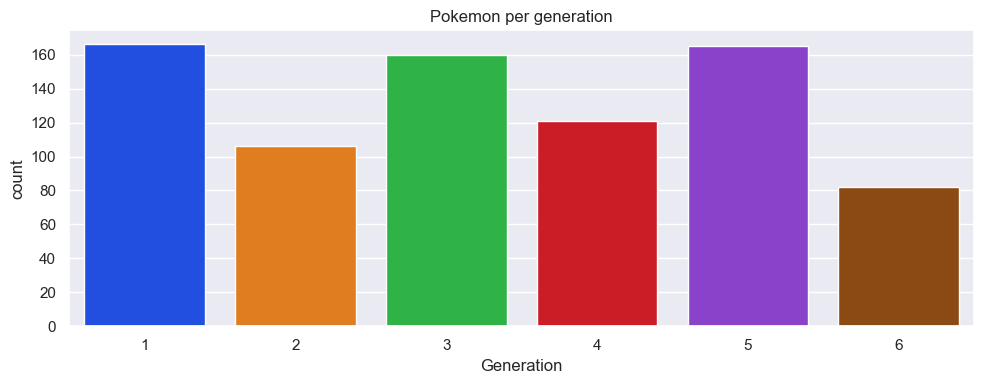

In [12]:
plt.figure(figsize=(10, 4))
plt.title("Pokemon per generation")
plt.xlabel("Generations")
plt.ylabel("Number of Gen.")

sns.countplot(
    data=new_pokemon_df,
    # по этому столбику
    x="Generation",
    # цвет
    palette="bright",
)

plt.tight_layout()

Из графика не особо понятно какое поколение лидирует, поэтому посчитаем.

In [13]:
new_pokemon_df['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

Покемоны 1 поколения в большинстве!

Меня интересуют разные характеристики у разных поколений покемонов.

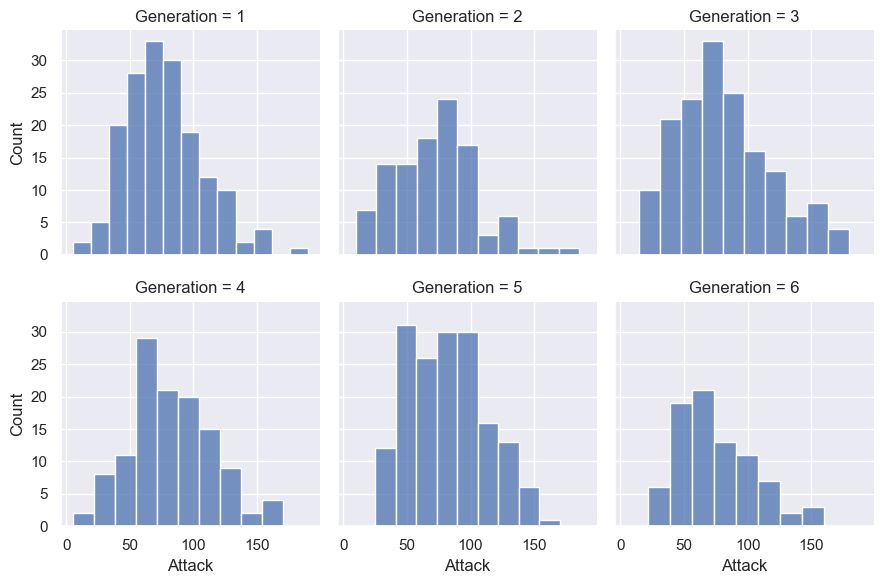

In [14]:
attack_repr = sns.FacetGrid(data=new_pokemon_df, col='Generation', col_wrap=3)

attack_repr.map(sns.histplot , 'Attack') 

In [15]:
mean_attack_generation = new_pokemon_df.groupby("Generation")["Attack"].mean().sort_values()
print(mean_attack_generation)

Generation
2    72.028302
6    75.804878
1    76.638554
3    81.625000
5    82.066667
4    82.867769
Name: Attack, dtype: float64


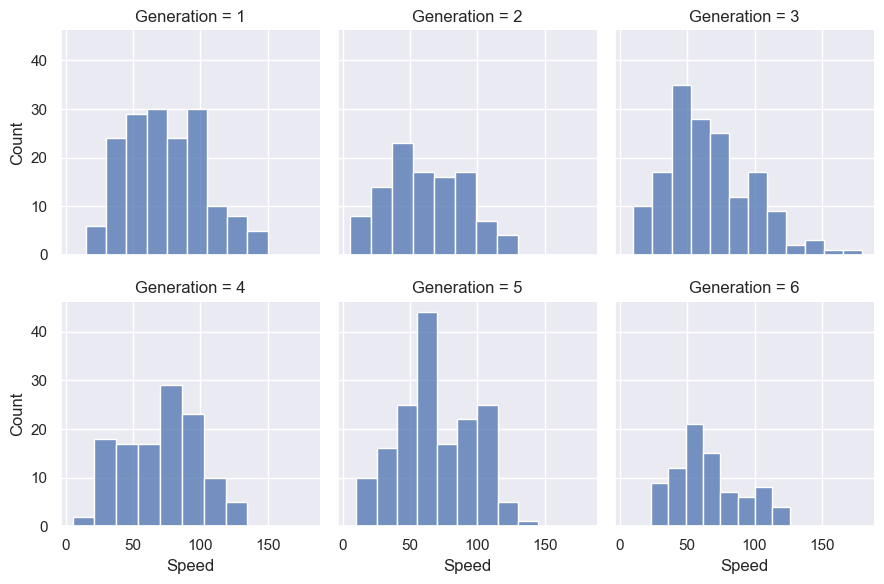

In [45]:
speed_repr = sns.FacetGrid(data=new_pokemon_df, col='Generation', col_wrap=3)

speed_repr.map(sns.histplot , 'Speed') 

In [17]:
mean_speed_generation = new_pokemon_df.groupby("Generation")["Speed"].mean().sort_values()
print(mean_attack_generation)

Generation
2    61.811321
6    66.439024
3    66.925000
5    68.078788
4    71.338843
1    72.584337
Name: Speed, dtype: float64


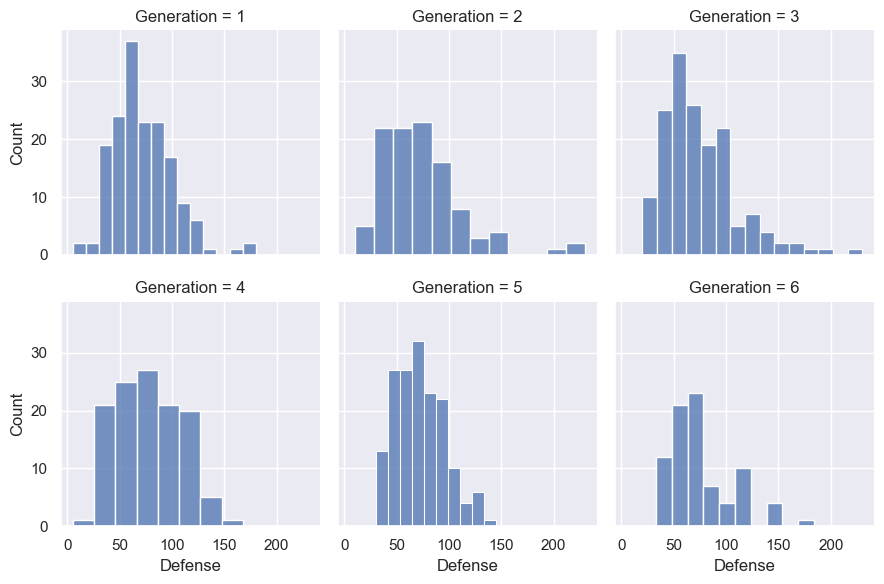

In [18]:
defense_repr = sns.FacetGrid(data=new_pokemon_df, col='Generation', col_wrap=3)

defense_repr.map(sns.histplot , 'Defense') 

In [19]:
mean_defense_generation = new_pokemon_df.groupby("Generation")["Defense"].mean().sort_values()
print(mean_attack_generation)

Generation
1    70.861446
5    72.327273
2    73.386792
3    74.100000
6    76.682927
4    78.132231
Name: Defense, dtype: float64


Из рассмотренных графиков можно сделать вывод, что покемоны 3 поколения хоть и не в большинстве, но близки, а также имеют неплохие характеристики, поэтому стоит ожидать, что легендарных покемонов в этом поколении будет больше всего.

### Теперь создадим отдельный датасет, содержащий только легендарных покемонов

In [20]:
legendary_poke = new_pokemon_df[new_pokemon_df["Legendary"] == True]

In [21]:
legendary_poke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 156 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          65 non-null     object
 1   Name        65 non-null     object
 2   Type 1      65 non-null     object
 3   Type 2      65 non-null     object
 4   Total       65 non-null     int64 
 5   HP          65 non-null     int64 
 6   Attack      65 non-null     int64 
 7   Defense     65 non-null     int64 
 8   Sp. Atk     65 non-null     int64 
 9   Sp. Def     65 non-null     int64 
 10  Speed       65 non-null     int64 
 11  Generation  65 non-null     int64 
 12  Legendary   65 non-null     bool  
dtypes: bool(1), int64(8), object(4)
memory usage: 6.7+ KB


In [22]:
legendary_poke.tail()

,Id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


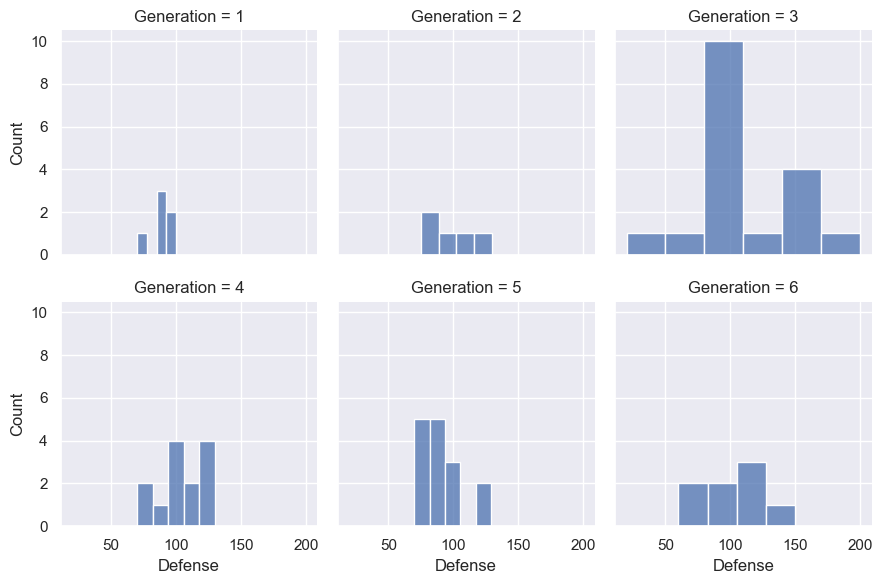

In [23]:
leg_defense_repr = sns.FacetGrid(data=legendary_poke, col='Generation', col_wrap=3)

leg_defense_repr.map(sns.histplot , 'Defense') 

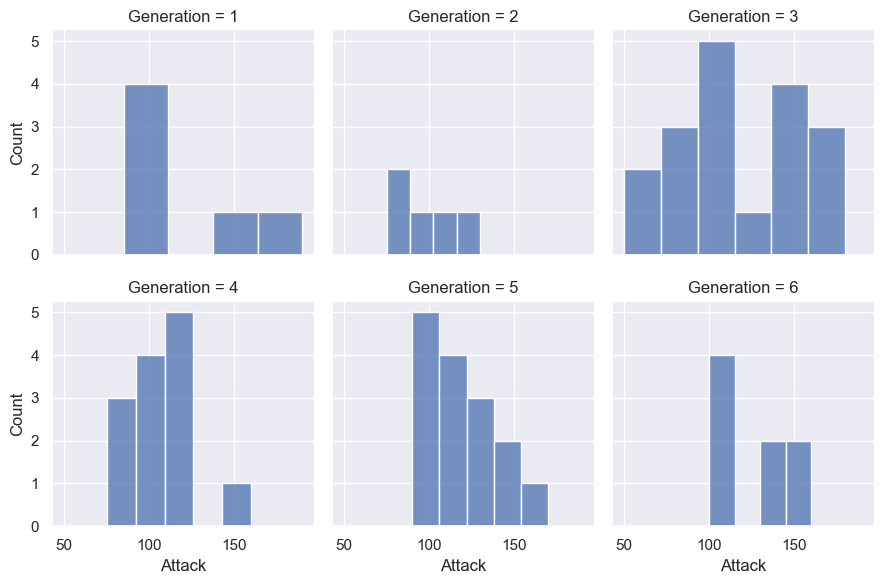

In [53]:
leg_attack_repr = sns.FacetGrid(data=legendary_poke, col='Generation', col_wrap=3)

leg_attack_repr.map(sns.histplot , 'Attack') 

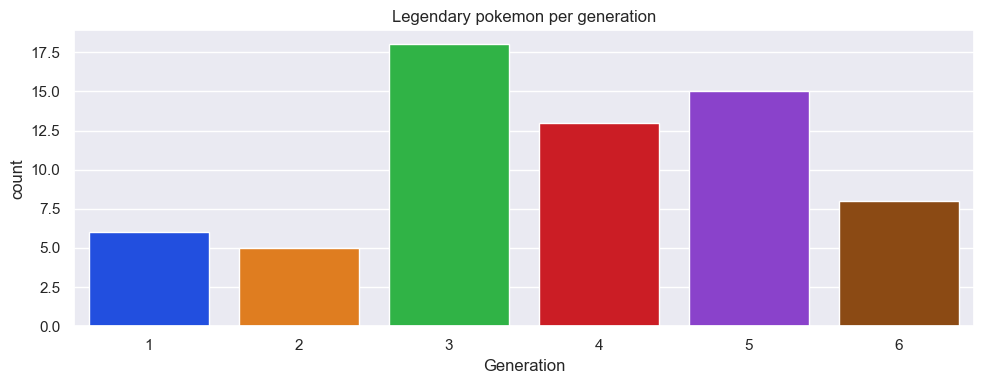

In [51]:
plt.figure(figsize=(10, 4))
plt.title("Legendary pokemon per generation")
plt.xlabel("Generations")
plt.ylabel("Number of Gen.")

sns.countplot(
    data=legendary_poke,
    # по этому столбику
    x="Generation",
    # цвет
    palette="bright",
)

plt.tight_layout()

In [52]:
legendary_poke['Generation'].value_counts()

3    18
5    15
4    13
6     8
1     6
2     5
Name: Generation, dtype: int64

Как и ожидалось, третье поколение покемонов лидирует!

Попробуем узнать, сможем ли мы определить легендарный покемон или нет по характеристикам.

### Построение модели 

In [41]:
new_pokemon_df.drop(['Name', 'Type 1', 'Type 2'], axis=1,inplace=True)
new_pokemon_df.head()

,Id,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1 Code
0,1,318,45,49,49,65,65,45,1,False,9
1,2,405,60,62,63,80,80,60,1,False,9
2,3,525,80,82,83,100,100,80,1,False,9
3,3,625,80,100,123,122,120,80,1,False,9
4,4,309,39,52,43,60,50,65,1,False,6


In [43]:
X = new_pokemon_df.drop(['Legendary'],axis=1)
y = new_pokemon_df['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 101)
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[217   2]
 [  7  14]]
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       219
        True       0.88      0.67      0.76        21

    accuracy                           0.96       240
   macro avg       0.92      0.83      0.87       240
weighted avg       0.96      0.96      0.96       240

